## Review IMDB - Keras - LSTM - Sentiment Analysis Classifier

### Bibliotecas

In [0]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

#plotagem da rede
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print("Usando Keras em sua versão: ", __version__, "backend:", K.backend())

assert(LV(__version__) >=LV("2.0.0"))

Usando Keras em sua versão:  2.2.4 backend: tensorflow


### Separação dos dados de Treino e Teste

In [0]:
#utilizar palavras mais frquentes pra montar o classificador

nb_words = 10000

maxlen = 80

print("Carregando...")

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=nb_words)

print('x_train', x_train.shape)
print('x_test', x_test.shape)
print()

print('Sequenciais(amostras x tempo)')

x_train = sequence.pad_sequences(x_train, maxlen=maxlen) #verificar se o texto foi cortado da maneira correta
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Carregando...
17465344/17464789 [==============================] - 0s 0us/step
x_train (25000,)
x_test (25000,)

Sequenciais(amostras x tempo)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
print("Primeiro review no set de treinamento: \n \n", x_train[0], "comprimento:", len(x_train[0]), "classe:", y_train[0])

Primeiro review no set de treinamento: 
 
 [  15  256    4    2    7 3766    5  723   36   71   43  530  476   26
  400  317   46    7    4    2 1029   13  104   88    4  381   15  297
   98   32 2071   56   26  141    6  194 7486   18    4  226   22   21
  134  476   26  480    5  144   30 5535   18   51   36   28  224   92
   25  104    4  226   65   16   38 1334   88   12   16  283    5   16
 4472  113  103   32   15   16 5345   19  178   32] comprimento: 80 classe: 1


### Parametros do modelo - construção da RNN (LSTM)

In [0]:
#parametros para o nosso modelo

#Embeddings de palavras
embedding_dims = 50 #numero de conjunto de palavras

lstm_units = 32 #numero de 

print("Construindo...")

model = Sequential()

model.add(Embedding(nb_words, embedding_dims, input_length=maxlen))

model.add(Dropout(0.2)) #reflete na proxima camada 20% será dropado
#recebe a mesma informação e trata diferente

#Se estiver executando sem GPU

#LSTM
model.add(LSTM(lstm_units)) #tradicional

#Dropout depois da lstm
#model.add(Dropout(0.2)) #aparentemente com essa camada o modelo melhora um pouco mais

#-------------------------------------------------------------------------------
#se estiver usando GPU:
#-------------------------------------------------------------------------------
#model.add(CuDNNLSTM(lstm_units, return_sequences=True)) #return_sequences - recursivo - sequencia

#Para empilhar rede LSTM
#podendo gerar um ruim resultado dependendo

#Para empilhar várias RNN todas as camadas exceto a última precisam ter ""
#model.add(LSTM(lstm_units, return_sequences=True)) #As camadas posteriores alimentam as camadas anteriores
#model.add(LSTM(lstm_units))
#-------------------------------------------------------------------------------

model.add(Dense(1, activation="sigmoid"))

#Para validação: utilizar outros otimizadores e configurações

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy']
             )

print(model.summary())

Construindo...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 50)            500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 510,657
Trainable params: 510,657
Non-trainable params: 0
_________________________________________________________________
None


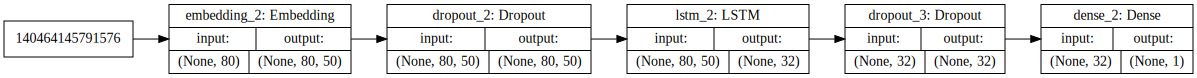

In [0]:
SVG(model_to_dot(model, show_shapes=True, rankdir='LR').create(prog='dot', format='svg')) #horizontal -> rankdir='LR' e vertical -> rankdir='TB'

In [0]:
#Treinamento do Modelo
epochs = 5
validation_split = 0.2

history = model.fit(x_train, y_train, batch_size=128,
                   epochs=epochs,
                   validation_split=validation_split)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 20s 1ms/step - loss: 0.5079 - acc: 0.7501 - val_loss: 0.4610 - val_acc: 0.7912
Epoch 2/5
20000/20000 [==============================] - 20s 981us/step - loss: 0.3302 - acc: 0.8615 - val_loss: 0.3504 - val_acc: 0.8426
Epoch 3/5
20000/20000 [==============================] - 20s 977us/step - loss: 0.2804 - acc: 0.8881 - val_loss: 0.3859 - val_acc: 0.8268
Epoch 4/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2506 - acc: 0.9011 - val_loss: 0.3550 - val_acc: 0.8432
Epoch 5/5
20000/20000 [==============================] - 20s 977us/step - loss: 0.2269 - acc: 0.9116 - val_loss: 0.4324 - val_acc: 0.8290


### Gráficos

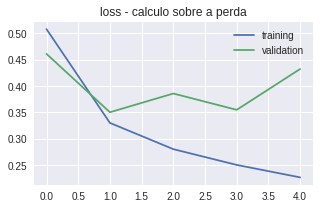

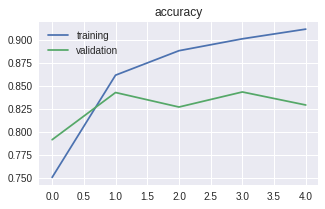

In [0]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.title('loss - calculo sobre a perda')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(history.epoch, history.history['acc'], label='training')
plt.plot(history.epoch, history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best')